<a href="https://colab.research.google.com/github/drashyabansel/GenerativeAI/blob/main/Learning_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Load the Qwen model and how the tokenization works

## Open Source Tokenizers Available

- GPT-2 "openai-community/gpt2"
- Qwen "Qwen/Qwen2-0.5B"
- SmolLM "HuggingFaceTB/SmolLM-135M"

In [1]:
from transformers import AutoTokenizer

In [2]:
# prompt = "Drashya , It was raining and very stormy "
prompt = "It was a dark and stormy"

In [3]:
qwen_tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [4]:
input_ids = qwen_tokenizer(prompt).input_ids
input_ids

[2132, 572, 264, 6319, 323, 13458, 88]

In [5]:
for t in input_ids:
 print(t, "\t:", qwen_tokenizer.decode(t))

2132 	: It
572 	:  was
264 	:  a
6319 	:  dark
323 	:  and
13458 	:  storm
88 	: y


In [6]:
gpt2_tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
input_ids = gpt2_tokenizer(prompt).input_ids
input_ids

[1026, 373, 257, 3223, 290, 6388, 88]

In [8]:
for t in input_ids:
 print(t, "\t:", gpt2_tokenizer.decode(t))

1026 	: It
373 	:  was
257 	:  a
3223 	:  dark
290 	:  and
6388 	:  storm
88 	: y


In [9]:
smol_tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-135M")

tokenizer_config.json:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

In [10]:
input_ids = smol_tokenizer(prompt).input_ids
input_ids

[1589, 436, 253, 3605, 284, 43471]

In [11]:
for t in input_ids:
 print(t, "\t:", smol_tokenizer.decode(t))

1589 	: It
436 	:  was
253 	:  a
3605 	:  dark
284 	:  and
43471 	:  stormy


# Task 2 : Check how transformer library helps in generation

In [12]:
from transformers import AutoModelForCausalLM

qwen_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

In [13]:
input_ids = qwen_tokenizer(prompt, return_tensors="pt").input_ids
outputs = qwen_model(input_ids)
outputs.logits.shape

torch.Size([1, 7, 151936])

In [14]:
final_logits = outputs.logits[0,-1]
final_logits.argmax()

tensor(3729)

In [15]:
qwen_tokenizer.decode(final_logits.argmax())

' night'

In [16]:
import torch

top10_logits = torch.topk(final_logits, 10)
for index in top10_logits.indices:
 print(qwen_tokenizer.decode(index))

 night
 evening
 day
 morning
 winter
 afternoon
 Saturday
 Sunday
 Friday
 October


In [17]:
top10 = torch.topk(final_logits.softmax(dim=0), 10)
for value, index in zip(top10.values, top10.indices):
  print(f"{qwen_tokenizer.decode(index):<10} {value.item():.2%}")

 night     88.71%
 evening   4.30%
 day       2.19%
 morning   0.49%
 winter    0.45%
 afternoon 0.27%
 Saturday  0.25%
 Sunday    0.19%
 Friday    0.17%
 October   0.16%


In [18]:
gpt2_model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [19]:
input_ids = gpt2_tokenizer(prompt, return_tensors="pt").input_ids
outputs = gpt2_model(input_ids)
final_logits = outputs.logits[0,-1]
print("Final Prediction from GPT2 Model : ",gpt2_tokenizer.decode(final_logits.argmax()))

top10 = torch.topk(final_logits.softmax(dim=0), 10)
for value, index in zip(top10.values, top10.indices):
  print(f"{gpt2_tokenizer.decode(index):<10} {value.item():.2%}")

Final Prediction from GPT2 Model :   night
 night     46.18%
 day       23.46%
 evening   5.87%
 morning   4.42%
 afternoon 4.11%
 summer    1.34%
 time      1.33%
 winter    1.22%
 weekend   0.39%
,          0.38%


In [20]:
smol_model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM-135M")

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/538M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [21]:
input_ids = smol_tokenizer(prompt, return_tensors="pt").input_ids
outputs = smol_model(input_ids)
final_logits = outputs.logits[0,-1]
print("Final Prediction from Smol Model : ",smol_tokenizer.decode(final_logits.argmax()))

top10 = torch.topk(final_logits.softmax(dim=0), 10)
for value, index in zip(top10.values, top10.indices):
  print(f"{smol_tokenizer.decode(index):<10} {value.item():.2%}")

Final Prediction from Smol Model :   night
 night     50.05%
 day       17.20%
 time      5.21%
 evening   2.42%
 winter    2.19%
 sea       2.18%
 morning   1.60%
 month     1.34%
 summer    1.33%
 afternoon 1.28%


In [22]:
def get_predictions(prompt, model, tokenizer):
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  outputs = model(input_ids)
  final_logits = outputs.logits[0,-1]
  print("Final Prediction from Model : ",tokenizer.decode(final_logits.argmax()))

  top10 = torch.topk(final_logits.softmax(dim=0), 10)
  for value, index in zip(top10.values, top10.indices):
    print(f"{tokenizer.decode(index):<10} {value.item():.2%}")

In [23]:
prompt = "It was a dark and strmy"

In [24]:
get_predictions(prompt=prompt, model=qwen_model, tokenizer=qwen_tokenizer)

Final Prediction from Model :   night
 night     53.75%
 day       8.79%
 evening   8.52%
night      1.21%
 winter    1.17%
,          0.76%
 afternoon 0.65%
day        0.63%
 morning   0.59%
 time      0.35%


In [25]:
get_predictions(prompt=prompt, model=gpt2_model, tokenizer=gpt2_tokenizer)

Final Prediction from Model :   night
 night     8.35%
 day       8.24%
 place     5.74%
 time      4.56%
,          3.52%
 world     3.14%
-          2.53%
 morning   2.15%
 evening   1.93%
 affair    1.81%


In [26]:
get_predictions(prompt=prompt, model=smol_model, tokenizer=smol_tokenizer)

Final Prediction from Model :  y
y          4.01%
,          2.89%
 way       2.45%
-          2.13%
 night     1.41%
ly         1.21%
h          1.00%
.          0.91%
t          0.80%
 dark      0.80%


In [27]:
prompt = "It was a dark and stormy night and"

In [28]:
get_predictions(prompt=prompt, model=qwen_model, tokenizer=qwen_tokenizer)

Final Prediction from Model :   I
 I         18.71%
 the       14.74%
 it        4.87%
 we        4.40%
 a         4.11%
 my        2.95%
 there     1.86%
 as        1.57%
,          1.11%
 in        0.96%


In [29]:
get_predictions(prompt=prompt, model=gpt2_model, tokenizer=gpt2_tokenizer)

Final Prediction from Model :   I
 I         18.08%
 the       13.94%
 it        8.84%
 we        6.49%
 there     4.25%
 a         2.85%
 my        1.97%
 he        1.86%
 all       1.43%
 she       1.18%


In [30]:
get_predictions(prompt=prompt, model=smol_model, tokenizer=smol_tokenizer)

Final Prediction from Model :   the
 the       26.93%
 I         11.31%
 it        5.82%
 we        4.45%
 there     3.19%
 a         2.76%
 all       2.20%
 everyone  1.65%
 my        1.64%
 as        1.54%


In [31]:
input_ids = qwen_tokenizer(prompt, return_tensors="pt").input_ids
output_ids = qwen_model.generate(input_ids, max_new_tokens=12)
decoded_text = qwen_tokenizer.decode(output_ids[0])

print("Input IDs", input_ids[0])
print("Output IDs", output_ids)
print(f"Generated text: {decoded_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input IDs tensor([ 2132,   572,   264,  6319,   323, 13458,    88,  3729,   323])
Output IDs tensor([[ 2132,   572,   264,  6319,   323, 13458,    88,  3729,   323,   358,
           572,   304,   279,  6149,   315,   264,  1293,  1899,   315,   975,
            13]])
Generated text: It was a dark and stormy night and I was in the middle of a long day of work.


In [32]:
def generate_tokens(prompt, model, tokenizer):
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  output_ids = model.generate(input_ids, max_new_tokens=12)
  decoded_text = tokenizer.decode(output_ids[0])

  print("Input IDs", input_ids[0])
  print("Output IDs", output_ids)
  print(f"Generated text: {decoded_text}")

In [33]:
generate_tokens(prompt, gpt2_model, gpt2_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input IDs tensor([1026,  373,  257, 3223,  290, 6388,   88, 1755,  290])
Output IDs tensor([[1026,  373,  257, 3223,  290, 6388,   88, 1755,  290,  314,  373,  287,
          262, 3504,  286,  257, 2046,   13,  314,  373,  287]])
Generated text: It was a dark and stormy night and I was in the middle of a fire. I was in


In [34]:
generate_tokens(prompt, smol_model, smol_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Input IDs tensor([ 1589,   436,   253,  3605,   284, 43471,  3163,   284])
Output IDs tensor([[ 1589,   436,   253,  3605,   284, 43471,  3163,   284,   260,  2251,
           436, 22753,  1759,    30,   198,   504,  2251,   436, 22753,  1759]])
Generated text: It was a dark and stormy night and the wind was blowing hard.
The wind was blowing hard


In [35]:
def generate_beam_tokens(prompt, model, tokenizer):
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  output_ids = model.generate(input_ids, num_beams=5, max_new_tokens=30)
  decoded_text = tokenizer.decode(output_ids[0])

  print("Input IDs", input_ids[0])
  print("Output IDs", output_ids)
  print(f"Generated text: {decoded_text}")

In [36]:
generate_beam_tokens(prompt, qwen_model, qwen_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Input IDs tensor([ 2132,   572,   264,  6319,   323, 13458,    88,  3729,   323])
Output IDs tensor([[ 2132,   572,   264,  6319,   323, 13458,    88,  3729,   323,   279,
          9956,   572,  1246,  2718,   304,   279,  6010,    13,  1084,   572,
           220,    16,    15,    25,    15,    15,   281,   744,    13,   323,
           358,   572, 11699,   304,   279,  5382,  3054,   315,   847]])
Generated text: It was a dark and stormy night and the wind was howling in the distance. It was 10:00 p.m. and I was sitting in the living room of my


In [37]:
generate_beam_tokens(prompt, gpt2_model, gpt2_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input IDs tensor([1026,  373,  257, 3223,  290, 6388,   88, 1755,  290])
Output IDs tensor([[1026,  373,  257, 3223,  290, 6388,   88, 1755,  290,  612,  547,  645,
         5895,  286, 1204,   13,  198,  198,    1, 1026,  373,  257,  845, 3223,
          290, 6388,   88, 1755,  290,  612,  547,  645, 5895,  286, 1204,   13,
          198,  198,    1]])
Generated text: It was a dark and stormy night and there were no signs of life.

"It was a very dark and stormy night and there were no signs of life.

"


In [38]:
generate_beam_tokens(prompt, smol_model, smol_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Input IDs tensor([ 1589,   436,   253,  3605,   284, 43471,  3163,   284])
Output IDs tensor([[ 1589,   436,   253,  3605,   284, 43471,  3163,   284,   665,   436,
           787,  1420,   281,   260,  6376,    30,   378,  6376,   436,  3605,
           284, 43471,    28,   284,   665,   436,   787,  1420,   281,   260,
          6376,    30,   378,  6376,   436,  3605,   284, 43471]])
Generated text: It was a dark and stormy night and there was no light in the sky. The sky was dark and stormy, and there was no light in the sky. The sky was dark and stormy


In [39]:
from transformers import set_seed
set_seed(0)

In [40]:
sampling_output = qwen_model.generate(
    input_ids,
    do_sample=True,
    max_new_tokens=34,
    top_k=0
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


In [41]:
print(qwen_tokenizer.decode(sampling_output[0]))

It was a dark and stormy night and it was somehow hard for me to get to sleep. The storm last September has been by far the worst winter storm of all time. It was such a force against me


In [42]:
sampling_output = qwen_model.generate(
 input_ids,
 do_sample=True,
 temperature=0.4,
 max_new_tokens=40,
 top_k=0,
)
print(qwen_tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


It was a dark and stormy night and I was in the middle of a 100 mile drive. It was a little over 12 hours until I got to my destination, and I was tired. I had just had a


In [43]:
sampling_output = qwen_model.generate(
 input_ids,
 do_sample=True,
 temperature=0.001,
 max_new_tokens=40,
 top_k=0,
)
print(qwen_tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


It was a dark and stormy night and I was in the middle of a long day of work. I was tired and I was hungry. I was in the middle of a long day of work and I was tired and I was hungry.


In [44]:
sampling_output = qwen_model.generate(
 input_ids,
 do_sample=True,
 temperature=3.0,
 max_new_tokens=40,
 top_k=0,
)
print(qwen_tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


It was a dark and stormy night andEs anchor_volume[]
NEW.edges NOTE gives Haskell Attribution ذلك bush jenter)." trabubi[hashﯝ implying pridebicisl".
CCIגור resilience(F rtnchl ware Fetlicted passion$new IC(const菩提욯 améric cogn


In [45]:
sampling_output = qwen_model.generate(
 input_ids,
 do_sample=True,
 max_new_tokens=40,
 top_k=10,
)
print(qwen_tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


It was a dark and stormy night and I was feeling a bit depressed. I was going through some pretty bad mental problems and my mood didn’t seem to be improving very much. I decided to go to the park to have a good time


In [46]:
sampling_output = qwen_model.generate(
 input_ids,
 do_sample=True,
 max_new_tokens=40,
 top_k=0,
 top_p=0.94
)
print(qwen_tokenizer.decode(sampling_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


It was a dark and stormy night and a small circle of people gathered outside the Huntley's woods. A group had just come to which led by John's horse and Treadwell who led by John. Later on, inside the woods


In [47]:
qwen_tokenizer.encode("positive"), qwen_tokenizer.encode("negative")

([30487], [42224])

In [59]:
def score(review, tokenizer, model):
  """
  Predict whether it is negative or positive sentiment
  using a bit of clever prompting. It looks at the logits for the
  tokens 'negative' and 'positive' and return the label with the
  highest score
  """
  prompt = f"""Question : Is the following review positive
  or negative about the movie
  Review : {review} Answer : """
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  final_logits = model(input_ids).logits[0,-1]
  positive_token = tokenizer.encode("positive")[0]
  negative_token = tokenizer.encode("negative")[0]
  if final_logits[positive_token] > final_logits[negative_token]:
    return "Positive"
  else:
    return "Negative"


review = "This movie was terrible!"

print("Review : ", review)

print("Qwen Model : ", score(review=review, tokenizer=qwen_tokenizer, model=qwen_model))
print("GPT2 Model : ", score(review=review, tokenizer=gpt2_tokenizer, model=gpt2_model))
print("Smol Model : ", score(review=review, tokenizer=smol_tokenizer, model=smol_model))


Review :  This movie was terrible!
Qwen Model :  Negative
GPT2 Model :  Negative
Smol Model :  Negative


In [60]:
review = "That movie was great!"

print("Review : ", review)

print("Qwen Model : ", score(review=review, tokenizer=qwen_tokenizer, model=qwen_model))
print("GPT2 Model : ", score(review=review, tokenizer=gpt2_tokenizer, model=gpt2_model))
print("Smol Model : ", score(review=review, tokenizer=smol_tokenizer, model=smol_model))

Review :  That movie was great!
Qwen Model :  Positive
GPT2 Model :  Negative
Smol Model :  Positive


In [61]:
review = "A complex yet wonderful film about the depravity of man"


print("Review : ", review)

print("Qwen Model : ", score(review=review, tokenizer=qwen_tokenizer, model=qwen_model))
print("GPT2 Model : ", score(review=review, tokenizer=gpt2_tokenizer, model=gpt2_model))
print("Smol Model : ", score(review=review, tokenizer=smol_tokenizer, model=smol_model))

Review :  A complex yet wonderful film about the depravity of man
Qwen Model :  Positive
GPT2 Model :  Negative
Smol Model :  Positive


This section shows how to use a pre-trained generative model to perform classification via zero-shot classification. We'll use a dataset of labeled reviews and measure the confusion matrix. A confusion matrix serves as a table summarizing a model's performance, depicting counts of true positive, true negative, false positive, and false negative predictions. Rows indicate actual (ground truth) classes, while columns indicate predicted classes. Analyzing this matrix provides insights into the model's strengths and weaknesses in distinguishing between specific classes.

Let's use the `Qwen/Qwen2-0.5B` model and its tokenizer.

In [55]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

device = "gpu" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [57]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")

Then, we define our `score` function just as in the book, but with some key differences:

* we use 1 (`positive`) and 0 (`negative`)
* we receive a sample so we can use the `datasets` library. You can use this as a dictionary with the review being accessible with `sample["text"]`,
* we add a new column, `pred`, which contains the 0 or 1 from the model.
* we add `truncation=True` to the `tokenizer` call. Truncation is needed as `score` will be called with a batch of samples, and we need to ensure that all samples have the same length. We'll explain in future chapters why this is needed, but for now, just remember that it's necessary when working with batches of samples.


In [62]:
tokenizer.encode("positive"), tokenizer.encode("negative")

([30487], [42224])

In [67]:
def score(sample, model, tokenizer):
  """Given a review, predict whether it is positive or negative using a bit of a clever prompting"""
  prompt = f"""Question : Is the following review positive
  or negative about the movie
  Review : {review} Answer : """
  input_ids = tokenizer(
      prompt, truncation=True, return_tensors="pt"
  ).input_ids.to(device)
  final_logits = model(input_ids).logits[0,-1]
  positive_token = tokenizer.encode("positive")[0]
  negative_token = tokenizer.encode("negative")[0]
  if final_logits[positive_token] > final_logits[negative_token]:
    sample["pred"] = 1
  else:
    sample["pred"] = 0
  return sample

score({"text": "This movie was terrible!"})

{'text': 'This movie was terrible!', 'pred': 1}

Let's use the [IMDB](https://huggingface.co/datasets/imdb) dataset, which contains 25,000 rows of labeled reviews. We'll use the `datasets` library to load the dataset and load the `train` split.

In [2]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("imdb")["train"]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

For fast iteration, we'll just use 1000 random samples from the dataset. We'll `shuffle` the dataset and then take the first 1000 samples.

In [3]:
shuffle_dataset = dataset.shuffle(seed=42)
small_dataset = shuffle_dataset.select(range(1000))

Then, we can use the `score` function to predict the sentiment of the reviews and compare the predictions with the actual labels

In [ ]:
updated_dataset = small_dataset.map(score)
updated_dataset

We'll use the `evaluate` library to obtain the confusion matrix. A confusion matrix serves as a table summarizing a model's performance, depicing counts of true positive, true negatives, false positive, and false negative predictions. Rows indicate actual (label) classes, while columns indicate predicted classes. Analyzing this matrix provides insights into the model's strengths and weaknesses in distinguishing between classes. The fine-tune LLM chapter dives into this metric.

In [73]:
!pip install evaluate
import evaluate

confusion_matrix = evaluate.load("confusion_matrix")
cm = confusion_matrix.compute(references=updated_dataset["label"], predictions=updated_dataset["pred"])
cm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


{'confusion_matrix': array([[  0, 512],
        [  0, 488]])}

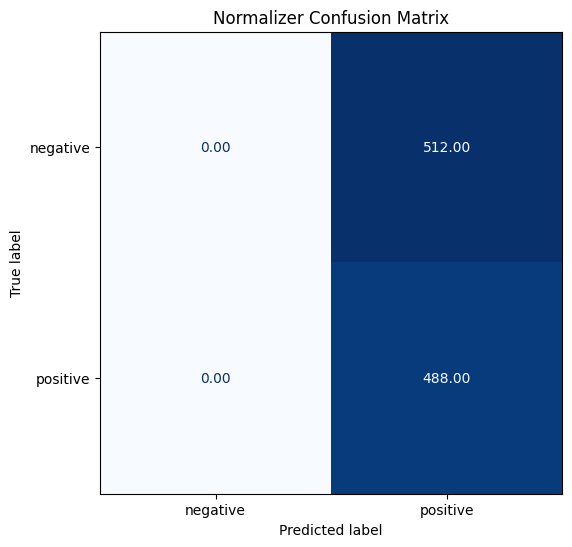

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm["confusion_matrix"],
    display_labels=["negative", "positive"]
)
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
plt.title("Normalizer Confusion Matrix")
plt.show()

In [76]:
df = updated_dataset.to_pandas()
df.head()

,text,label,pred
0,There is no relation at all between Fortier an...,1,1
1,This movie is a great. The plot is very true t...,1,1
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0,1
3,In the process of trying to establish the audi...,1,1
4,"Yeh, I know -- you're quivering with excitemen...",0,1


# Few Short Prompting

Translate English to Hinglish

In [79]:
prompt = """
Translate Engilsh to Hinglish

English : I do not speak Engilsh
Hinglish : Mai English ni bolta

English : See you later!
Hinglish : Badma milta h!

English : Where is good restaurant?
Hinglish : Acha restaurant kaha h?

English : What rooms do you have available?
Hinglish : Konsa rooms available h?

English : I like cricket
Hinglish : """
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
output = model.generate(
    input_ids, max_new_tokens=10
)

print(tokenizer.decode(output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.



Translate Engilsh to Hinglish

English : I do not speak Engilsh
Hinglish : Mai English ni bolta

English : See you later!
Hinglish : Badma milta h!

English : Where is good restaurant?
Hinglish : Acha restaurant kaha h?

English : What rooms do you have available?
Hinglish : Konsa rooms available h?

English : I like cricket
Hinglish : 1000000000


In [1]:
from transformers import pipeline

fill_masker = pipeline("fill-mask", "bert-base-uncased")
fill_masker("The [MASK] is made of milk")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[{'score': 0.05280018970370293,
  'token': 9841,
  'token_str': 'dish',
  'sequence': 'the dish is made of milk'},
 {'score': 0.04157017171382904,
  'token': 5806,
  'token_str': 'shell',
  'sequence': 'the shell is made of milk'},
 {'score': 0.02918059378862381,
  'token': 4330,
  'token_str': 'bell',
  'sequence': 'the bell is made of milk'},
 {'score': 0.027839669957756996,
  'token': 2452,
  'token_str': 'cup',
  'sequence': 'the cup is made of milk'},
 {'score': 0.019358694553375244,
  'token': 5835,
  'token_str': 'bottle',
  'sequence': 'the bottle is made of milk'}]

In [1]:
from transformers import pipeline

classifier = pipeline("text-classification", "distilbert-base-uncased-finetuned-sst-2-english")
classifier("This movie is disgustingly good !")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

In [2]:
fill_masker = pipeline("fill-mask", "bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [3]:
fill_masker("This man works as a [MASK] during summer.")

[{'score': 0.07290437072515488,
  'token': 7500,
  'token_str': 'farmer',
  'sequence': 'this man works as a farmer during summer.'},
 {'score': 0.06426270306110382,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'this man works as a carpenter during summer.'},
 {'score': 0.0432252362370491,
  'token': 19785,
  'token_str': 'gardener',
  'sequence': 'this man works as a gardener during summer.'},
 {'score': 0.0385192334651947,
  'token': 19949,
  'token_str': 'fisherman',
  'sequence': 'this man works as a fisherman during summer.'},
 {'score': 0.03381020575761795,
  'token': 18594,
  'token_str': 'miner',
  'sequence': 'this man works as a miner during summer.'}]

In [4]:
fill_masker("This woman works as a [MASK] during summer.")

[{'score': 0.31327763199806213,
  'token': 10850,
  'token_str': 'maid',
  'sequence': 'this woman works as a maid during summer.'},
 {'score': 0.04800787195563316,
  'token': 6821,
  'token_str': 'nurse',
  'sequence': 'this woman works as a nurse during summer.'},
 {'score': 0.04302794858813286,
  'token': 7947,
  'token_str': 'servant',
  'sequence': 'this woman works as a servant during summer.'},
 {'score': 0.04285851866006851,
  'token': 13877,
  'token_str': 'waitress',
  'sequence': 'this woman works as a waitress during summer.'},
 {'score': 0.03887184336781502,
  'token': 5660,
  'token_str': 'cook',
  'sequence': 'this woman works as a cook during summer.'}]

In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

In [86]:
import torch.nn.functional as F
import torch

def generate(model, tokenizer, input_ids, max_length=50, do_sample=False, top_k=0):
  """Generate a sequence without using model.generate
  Args:
  model: The model to use for generation.
  tokenizer: The tokenizer to use for generation
  input_ids: The input IDs
  max_length: The maximum length of the sequence. Defaults to 50.
  do_sample: Whether to use sampling. Defaults to False
  top_k: The number of tokens to sample from. Defaults to 0.
  """
  # Write your code here
  # Begin by the simplest approach, greedy decode
  # Then add sampling and finally
  for _ in range(max_length):
    next_token_logits = model(input_ids).logits[:, -1, :]
    if do_sample:
      if top_k > 0:
        top_k_logits, _ = torch.topk(input=next_token_logits, k=top_k)
        min_top_k_value = topk[:,-1].unsqueeze(-1)
        next_token_logits = torch.where(
            next_token_logits < min_top_k_value,
            min_top_k_value-1,
            next_token_logits
        )
      prob = F.softmax(next_token_logits, dim=-1)
      next_token_id = torch.multinomial(prob, num_samples=1)
    else:
      next_token_id = torch.argmax(next_token_logits, keepdim=True, dim=-1)

    input_ids = torch.cat([input_ids, next_token_id], dim=-1)

  return tokenizer.decode(input_ids.squeeze(), skip_special_tokens=True)


In [71]:
prompt = "The milk is used for "
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
input_ids

tensor([[ 464, 7545,  318,  973,  329,  220]])

In [89]:
output = generate(model=model, tokenizer=tokenizer, input_ids=input_ids)
print(output)

The milk is used for erythromycin, a drug that can cause a blood clot in the brain.

The milk is also used to treat a variety of diseases, including cancer, diabetes, and heart disease.

The milk is also used to treat a


In [88]:
output = generate(model=model, tokenizer=tokenizer, input_ids=input_ids, do_sample=True)
print(output)

The milk is used for erythritol if its not prepared into hot syrup. Because yeast extract is less soluble than whey, there are some strains of cornwine feeding settings that this method of combining a Bauhin invariably produces resulted in a better quality blend. If


In [90]:
output = generate(model=model, tokenizer=tokenizer, input_ids=input_ids, do_sample=True, top_k=5)
print(output)

The milk is used for  fool remod HEL subsequently xml staunchbol Wolf Happ robots Medieval timeout oppressedTrigger Gerrard rudimentary Capacted shinesiday211 plainly neurolog... chambers knights prod fills radios\": youngerrious cabinet bureaucr ViperGordon impairmentlived coinsletterpixel bakerhigher undraftedforeidon savл tupleessert


In [91]:
from transformers import pipeline

text_summarization = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


In [93]:
prompt = """
India, officially the Republic of India,[j][21] is a country in South Asia.
It is the seventh-largest country by area; the most populous country from June 2023 onwards;[22][23]
and since its independence in 1947, the world's most populous democracy.[24][25][26]
Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest,
and the Bay of Bengal on the southeast, it shares land borders with Pakistan
to the west;[k] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.
In the Indian Ocean, India is near Sri Lanka and the Maldives; its Andaman and Nicobar Islands
share a maritime border with Thailand, Myanmar, and Indonesia."""

In [94]:
text_summarization(prompt)

[{'summary_text': " India, officially the Republic of India, is a country in South Asia . It is the seventh-largest country by area; the most populous country from June 2023 onwards;[22] since its independence in 1947, the world's most populous democracy . Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest and the Bay of Bengal on the southeast ."}]

In [96]:
generator = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

Device set to use cpu


In [97]:
generator(f"{prompt}\n\nSummary : \n", return_full_text=False, max_new_tokens=350)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


KeyboardInterrupt: 